In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

In [3]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Merkle Sokrati Assignment/Data Clean 1.xlsx')

In [4]:
df.head(2)

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.0,0,0,0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.0,5,0,0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  16834 non-null  datetime64[ns]
 1   product               16834 non-null  object        
 2   phase                 16834 non-null  object        
 3   campaign_platform     16834 non-null  object        
 4   campaign_type         16834 non-null  object        
 5   communication_medium  16834 non-null  object        
 6   subchannel            16834 non-null  object        
 7   audience_type         16834 non-null  object        
 8   creative_type         16834 non-null  object        
 9   creative_name         16834 non-null  object        
 10  device                16834 non-null  object        
 11  age                   16834 non-null  object        
 12  spends                16834 non-null  float64       
 13  impressions     

In [ ]:
df.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16834.000000
mean,148.694236,287.959071,11.977783,2.103184
std,483.895724,2444.450327,44.796963,18.357855
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


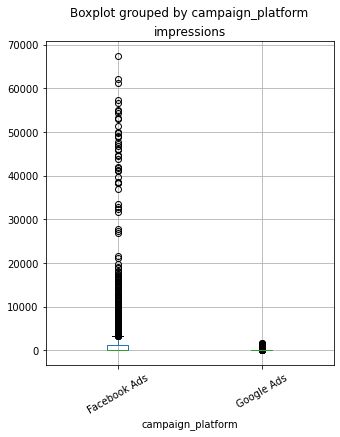

In [6]:
df.boxplot('impressions','campaign_platform',rot = 30,figsize=(5,6))

In [7]:
cat_df = df.select_dtypes(include=['object']).copy()

In [8]:
cat_df.head()

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age
0,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24
1,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34
2,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44
3,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined
4,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24


In [9]:
print(cat_df.isnull().values.sum())

0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


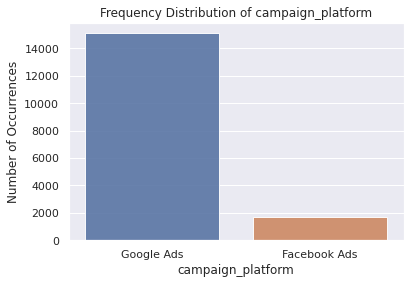

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df['campaign_platform'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of campaign_platform')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('campaign_platform', fontsize=12)
plt.show()

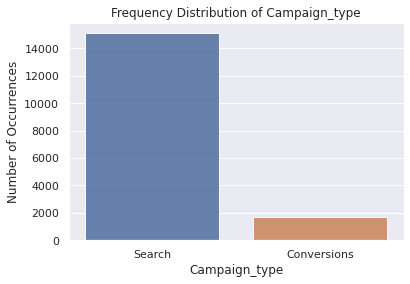

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df['campaign_type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Campaign_type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Campaign_type', fontsize=12)
plt.show()

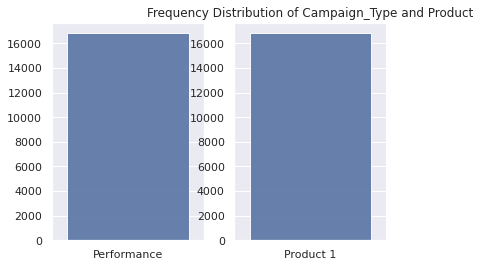

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
phase_count = cat_df['phase'].value_counts()
product_count = cat_df['product'].value_counts()
fig, ax =plt.subplots(1,2)
sns.set(style="darkgrid")
sns.barplot(phase_count.index, phase_count.values, alpha=0.9, ax=ax[0])
sns.barplot(product_count.index, product_count.values, alpha=0.9, ax=ax[1])
plt.title('Frequency Distribution of Campaign_Type and Product')
plt.show()

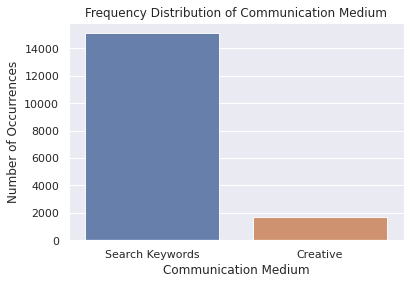

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df['communication_medium'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Communication Medium')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Communication Medium', fontsize=12)
plt.show()

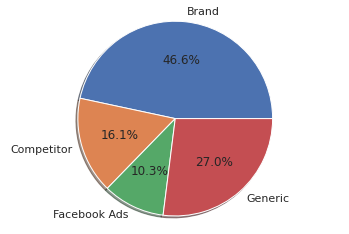

In [ ]:
labels = cat_df['subchannel'].astype('category').cat.categories.tolist()
counts = cat_df['subchannel'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

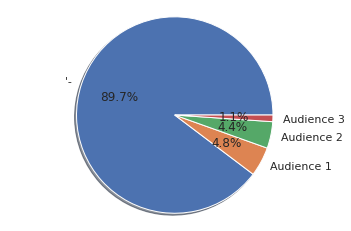

In [ ]:
labels = cat_df['audience_type'].astype('category').cat.categories.tolist()
counts = cat_df['audience_type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

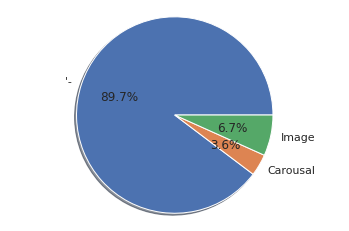

In [ ]:
labels = cat_df['creative_type'].astype('category').cat.categories.tolist()
counts = cat_df['creative_type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

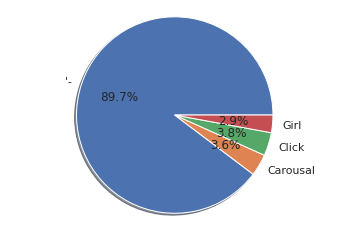

In [ ]:
labels = cat_df['creative_name'].astype('category').cat.categories.tolist()
counts = cat_df['creative_name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

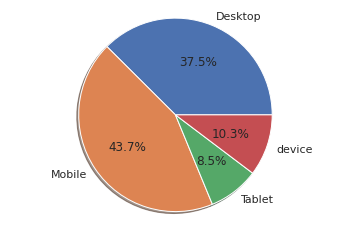

In [ ]:
labels = cat_df['device'].astype('category').cat.categories.tolist()
counts = cat_df['device'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

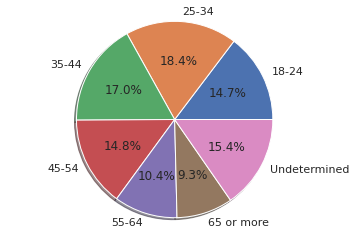

In [ ]:
labels = cat_df['age'].astype('category').cat.categories.tolist()
counts = cat_df['age'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [11]:
cat_df_onehot = cat_df.copy()
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['campaign_platform'], prefix = ['campaign_platform'])
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['campaign_type'], prefix = ['campaign_type'])
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['communication_medium'], prefix = ['communication_medium'])
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['subchannel'], prefix = ['subchannel'])
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['audience_type'], prefix = ['audience_type'])
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['creative_type'], prefix = ['creative_type'])
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['creative_name'], prefix = ['creative_name'])
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['device'], prefix = ['device'])
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['age'], prefix = ['age'])

print(cat_df_onehot.head())

     product        phase  ...  age_65 or more  age_Undetermined
0  Product 1  Performance  ...               0                 0
1  Product 1  Performance  ...               0                 0
2  Product 1  Performance  ...               0                 0
3  Product 1  Performance  ...               0                 1
4  Product 1  Performance  ...               0                 0

[5 rows x 34 columns]


In [12]:
conti_df = df.select_dtypes(include=['float64', 'int64']).copy()
conti_df.head()

,spends,impressions,clicks,link_clicks
0,0.00,0,0,0
1,0.00,5,0,0
2,0.00,1,0,0
3,14.63,5,3,0
4,53.31,10,2,0


In [13]:
result_df = pd.concat([cat_df_onehot, conti_df], axis=1)

print(result_df.head())

     product        phase  ...  clicks  link_clicks
0  Product 1  Performance  ...       0            0
1  Product 1  Performance  ...       0            0
2  Product 1  Performance  ...       0            0
3  Product 1  Performance  ...       3            0
4  Product 1  Performance  ...       2            0

[5 rows x 38 columns]


In [14]:
# Dropping irrelevant columns
result_df = result_df.drop(['product', 'phase'], axis=1)
result_df.head(5)

,campaign_platform_Facebook Ads,campaign_platform_Google Ads,campaign_type_Conversions,campaign_type_Search,communication_medium_Creative,communication_medium_Search Keywords,subchannel_Brand,subchannel_Competitor,subchannel_Facebook Ads,subchannel_Generic,audience_type_'-,audience_type_Audience 1,audience_type_Audience 2,audience_type_Audience 3,creative_type_'-,creative_type_Carousal,creative_type_Image,creative_name_'-,creative_name_Carousal,creative_name_Click,creative_name_Girl,device_Desktop,device_Mobile,device_Tablet,device_device,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or more,age_Undetermined,spends,impressions,clicks,link_clicks
0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.00,0,0,0
1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0.00,5,0,0
2,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.00,1,0,0
3,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,14.63,5,3,0
4,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,53.31,10,2,0


In [15]:
print(result_df.shape)

(16834, 36)


In [16]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [17]:
X = result_df.iloc[:, :-1].values
Y = result_df.iloc[:, -1].values

In [18]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [20]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

In [21]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[15:50:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [22]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.093369


In [23]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[15:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [24]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,18.053362,1.272220,17.876971,2.861805
1,16.429103,1.145540,16.281504,2.637325
2,14.955550,1.038495,14.858458,2.428112
3,13.949804,1.440191,13.747708,1.936201
4,13.440910,1.682893,13.168518,1.740737


In [25]:
print((cv_results["test-rmse-mean"]).tail(1))

49    2.73706
Name: test-rmse-mean, dtype: float64


In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[14:14:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


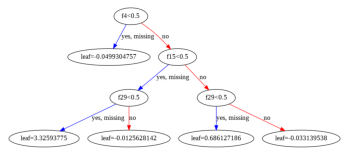

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 50]
plt.show()

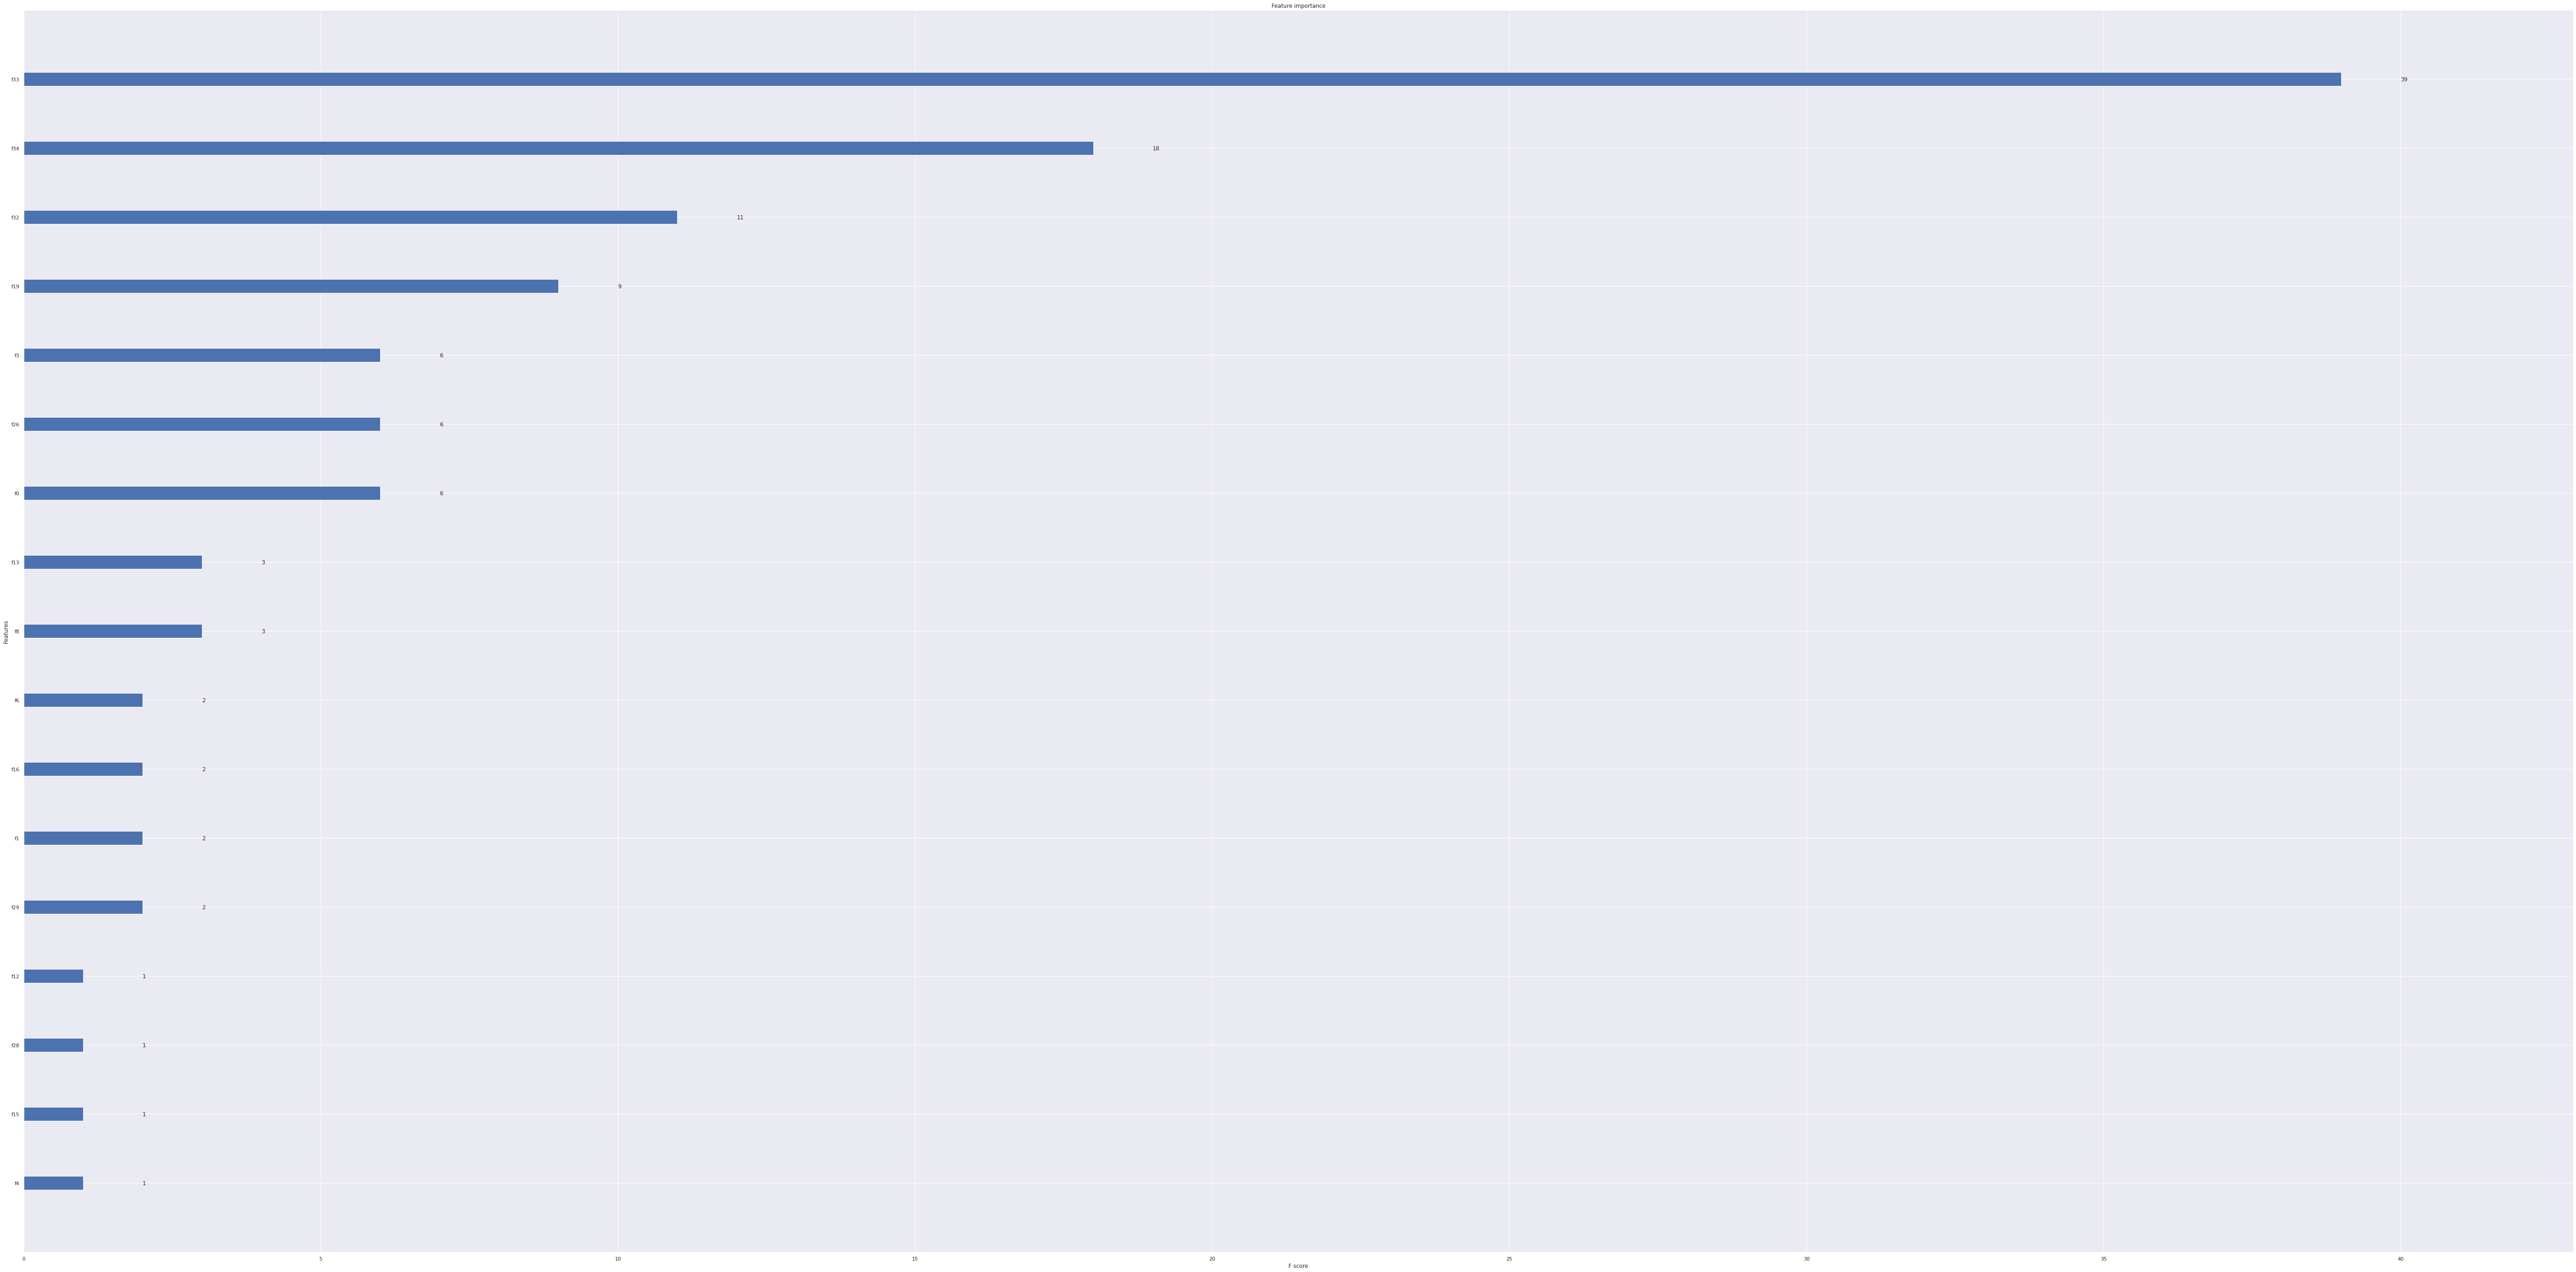

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()